# Exercise 1

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)</br>
    - 1.2 [Data source and data set](#section102)</br>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)</br>
    - 3.2 [head](#section302)</br>
    - 3.3 [shape](#section303)</br>
    - 3.4 [sample](#section304)</br>
    - 3.5 [Pandas Pre Profiling](#section305)</br>
    - 3.6 [Initial Observations](#section306)</br>
    - 3.7 [Final Observations](#section307)</br>
    - 3.8 [Pandas Post Profiling](#section308)</br>
- 4. [Data Normalization](#section4)</br>   
    - 4.1 [Renaming the STID column to 'ID' in fuel_prices DF and mergin with gas_station DF](#section401)</br>
    - 4.2 [Converting Date to Time series object for indexing](#section402)</br>
    - 4.3 [Adding Year, Month, Week, Day of Week to DF](#section403)</br>
    - 4.5 [Subsetting BRAND and respective gasoline prices](#section404)</br>
- 5. [EDA through Questions](#section5)</br>
    - 5.1 [How many different stations exist in the data set and what is the existing history in days](#section501)</br>
    - 5.2 [What is the min, mean, max price for each gasoline type and station weekly?](#section502)</br>
    - 5.3 [What is the cheapest station __(in average)__ and why?](#section503)</br>
    - 5.4 [At which day of a week is the price most likely the cheapest __(week profile)__?](#section504)</br>
    - 5.5 [At which hour during a day is the price the cheapest in average __(hour profile)__?](#section505)</br>
    - 5.6 [How many different station locations are present in the data __(visualize via a map)__?](#section506)</br>
    - 5.7 [What is the gas station which has most price data points, choose one and draw the time series for all 3 gasoline types?](#section507)</br>
    - 5.8 [At which hour during a day do we have the most price changes?](#section508)</br>
    - 5.9 [Select 20 gas stations having the longest time history and visualize the average price per month. Use heatmap and only the prices between 12:00-13:00 of E10 and DIESEL](#section509)</br>
    - 5.10 [Describe a possible business potential in Euros for the customer (textual description in the ipython file). Define the constraints of the business case 5 lines, the answer max 15 lines __(high level summary)__](#section510)</br>

<a id=section1></a>
## 1. Problem Statement


Would knowing the gas prices in real time add any value to the company dealing with a fleet of cars, especially in their maintenance services

<a id=section101></a>
### 1.1 Introduction
The OLAT System provides an extraction of data of gasoline prices in Germnay. The prices are real time and are available for analysis. We would like to know whether these prices hold any relevance in prices of cars.

<a id=section102></a>
### 1.2 Data Source and dataset
__a__. Source of Data

- __Name__: "Tanker Konig"
- __API Endpoint__: https://creativecommons.tankerkoenig.de/

<a id=section2></a>
## 2. Load the packages and data

In [1]:
import sys
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point,Polygon
from pandas import Series
import string
from pandas import testing as pdt
import descartes
import unittest
%matplotlib inline
sns.set()


gas_station = pd.read_csv("example_sprit_cut_station.csv", delimiter=';')
fuel_prices = pd.read_csv("example_sprit_cut_prices.csv", delimiter=";")
crs = {'init': 'epsg:4326'}


<a id=section3></a>
### 3. Data Profiling

Let's first review what data types our variables are?</br>
Do we need to transform any variable with respect to standards before we start analysis?

<a id=section301></a>

In [2]:
gas_station.dtypes

ID                            object
VERSION                        int64
VERSION_TIME                  object
NAME                          object
BRAND                         object
STREET                        object
HOUSE_NUMBER                  object
POST_CODE                     object
PLACE                         object
PUBLIC_HOLIDAY_IDENTIFIER     object
LAT                          float64
LNG                          float64
dtype: object

<a id=section302></a>

In [3]:
fuel_prices.dtypes

STID            object
E5               int64
E10              int64
DIESEL           int64
DATE_CHANGED    object
CHANGED          int64
dtype: object

In [4]:
fuel_prices['DATE_CHANGED']=pd.to_datetime(fuel_prices.DATE_CHANGED)

In [5]:
gas_station.head(2)

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691


In [6]:
fuel_prices.head(2)

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01,21


In [7]:
gas_station.shape

(824, 12)

In [8]:
fuel_prices.shape

(2189526, 6)

In [9]:
gas_station.sample(5)

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
349,6f1d7ec4-30bc-42ff-b0d2-c6f85692047f,12,2015-08-28 12:00:02.000000,Esso Tankstelle,ESSO,ARNULFSTR. 79,,66954,PIRMASENS,\N,49.192141,7.589887
306,ed5786ec-6ae6-4c5e-b28e-a9682cbcdf23,232,2015-02-01 12:32:24.000000,Silke Schreiner,AVIA,Erpolzheimer Str.,23,67251,Freinsheim,\N,49.507300,8.217590
725,fbaff7c7-9e58-4f6e-afcb-58bd0f9679b7,1,2013-08-07 02:01:16.000000,Total KARLSRUHE,Total,KARLSRUHER STR.,82,76139,KARLSRUHE,\N,49.025444,8.449166
400,9ceb0cff-f034-4757-9595-f318b8d24347,5,2014-11-03 12:00:00.000000,OIL! Tankstelle Pirmasens,OIL!,Bitscher Str. 67,\N,66955,Pirmasens,\N,49.191403,7.608742
225,639531b9-8650-4a54-ab54-6ab7915de516,30,2015-05-03 12:32:36.000000,AVIA Kreimbach-Kaulbach,AVIA,Wallackerhof,1,67757,Kreimbach-Kaulbach,\N,49.554400,7.619600


In [10]:
fuel_prices.sample(5)

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
1429127,21e837d5-0eb6-40d2-b30d-7cfa7a0d2b79,1449,1429,1189,2015-06-11 08:02:01,21
804761,c2315759-2122-4427-9aa0-c0f616d64988,1369,1329,1219,2014-12-07 11:21:00,20
471258,3999b580-63f5-45c6-b14e-d6d1ed51b6f9,1379,1359,1119,2015-09-02 09:18:01,21
552042,53f1bb34-8123-4b7a-aa25-94b3a49d82d3,1539,1499,1349,2014-09-30 15:42:01,20
1567374,a6fdf6e7-d225-49b1-95a6-9465c4f3a980,1299,1259,1179,2014-12-25 15:14:01,1


In [11]:
gas_station_pre_profile = pandas_profiling.ProfileReport(gas_station)
gas_station_pre_profile.to_file(outputfile='gas_station_before_profiling.html')

fuel_prices_pre_profile = pandas_profiling.ProfileReport(fuel_prices)
fuel_prices_pre_profile.to_file(outputfile='fuel_prices_before_profiling.html')

<a id=section306></a>
### 3.6 Initial Observations

#### gas_station _DataFrame_
- __ID__ column has __412__ unique values. Also __each ID__ has a _frequency_ of __2__, meaning there are _duplicates_ that need to be removed based on this column only.</br>
- __BRAND__ column is categorical with a distinct count of __56__. Hence total __56__ brands</br>
- __NAME__ column is categorical with a distinct count of __295__. Hence total __295__ units.</br>

#### fuel_prices _DataFrame_
- __E10__ column is highly correlated with __E5__. 
- __STID__ has a high cardinality with __412__ distinct values. 
- Entire dataset has __1094763__ duplicates. We need to clean this primarily

The following remarks were obtained from https://creativecommons.tankerkoenig.de/ regarding data in fuel_prices data

Column	meaning	Remarks

stidis reference to the gas station ID	
e5	Price for a liter of Super E5	In tenths of a cent
e10	Price for a liter of Super E10	In tenths of a cent
diesel	Price for a liter of diesel	In tenths of a cent
date	Time of this change	see below
changed	Bitmask for the change	see below
Hints
For reasons of space, only price changes are stored in the history table. The price at a certain point in time must therefore be calculated from the last change.
If an invalid price was transferred, -1 stands in the respective price column.
The changed column contains (also for reasons of space) for each type of fuel (diesel, E5, E10) flags that have the following meaning and are added together:
Bitmask for the change

       diesel	E5 	E10
new	     3  	12	48
removed	 2	    8th	32
changed	 1	    4	16

For example, if diesel and E10 prices have been changed, 17 is changed to 17 (1 + 16).

A price is new if 
a) the type of fuel has not previously been run by the gas station,
b) the gas station is new, or
c) after the MTS-K has not supplied any prices for maintenance for some time.

#### _Cleaning fuel__prices  DataFrame_

#### _Checking for  duplicates from_ fuel_prices _DataFrame_

In [12]:
print('Total no. of entries in dataset :\n{0}'.format(fuel_prices.count()))

Total no. of entries in dataset :
STID            2189526
E5              2189526
E10             2189526
DIESEL          2189526
DATE_CHANGED    2189526
CHANGED         2189526
dtype: int64


#### _Removing Duplicates from_ fuel_prices _DataFrame_

In [13]:
fuel_prices = fuel_prices.drop_duplicates()
print('The shape of the data set is: {0}'.format(fuel_prices.shape))
print('Total no. of entries in dataset after removing duplicates are:\n{0}'.format(fuel_prices.count()))

The shape of the data set is: (1094763, 6)
Total no. of entries in dataset after removing duplicates are:
STID            1094763
E5              1094763
E10             1094763
DIESEL          1094763
DATE_CHANGED    1094763
CHANGED         1094763
dtype: int64


After removing the duplicates the no of entries reduced from  2189526 to 1094763


#### _Removing rows with 0 values in price  from_ fuel_prices _DataFrame_

In [14]:
print('The shape of the data set is: {0}'.format(fuel_prices.shape))

The shape of the data set is: (1094763, 6)


In [15]:
## Checking for -rows with invalid data(-1) or impossible data price equal to zero(0) in the dataframe fuel_prices

DIESEL_invalid  = fuel_prices[(fuel_prices['DIESEL']== 0)|(fuel_prices['DIESEL']== -1)]
print(DIESEL_invalid.shape)
E5_invalid = fuel_prices[(fuel_prices['E5']== 0)|(fuel_prices['E5']== -1)]
print(E5_invalid.shape)
E10_invalid = fuel_prices[(fuel_prices['E10']== 0)|(fuel_prices['E10']== -1)]
print(E10_invalid.shape)

(187, 6)
(17272, 6)
(19166, 6)


In [16]:
fuel_prices.drop(fuel_prices[(fuel_prices.E10==0)|(fuel_prices.E10==-1)|(fuel_prices.E5==0)|(fuel_prices.E5==-1)|\
                 (fuel_prices.DIESEL==0)|(fuel_prices.DIESEL==-1)].index, inplace=True)

print('The shape of the data set is: {0}'.format(fuel_prices.shape)) 
print('Total no. of entries in dataset after removing rows with 0 as price value are:\n{0}'.format(fuel_prices.count()))

The shape of the data set is: (1075425, 6)
Total no. of entries in dataset after removing rows with 0 as price value are:
STID            1075425
E5              1075425
E10             1075425
DIESEL          1075425
DATE_CHANGED    1075425
CHANGED         1075425
dtype: int64


## Removing the outliers using a function



In [17]:
# Normalization of data

def data_normalization(col_name):   
    data_mean, data_std = fuel_prices[col_name].mean(), fuel_prices[col_name].std()
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off


    fuel_prices[col_name]=np.where(np.logical_or(fuel_prices[col_name] < lower,fuel_prices[col_name] > upper), \
                                   fuel_prices[col_name].median(), fuel_prices[col_name])

data_normalization('E5')
data_normalization('E10')
data_normalization('DIESEL')



The following remarks were obtained from https://creativecommons.tankerkoenig.de/ regarding data in gas_station data

id	is unique, steady ID of the gas station	
version	Version number are not very meaningful
version_time	 is information on the last change of the version number	
Name of gas station	Can be empty, there are no clear guidelines what to stand here
Street is	Name of the street, often the house number is given here
House number	Can be empty too
Postcode	Is reliable
place is location  indicated by name of the village, occasionally with district
public_holiday_identifier is abbreviation for state	and is usually not specified
lat	is latitude of the site	
lng	is geographical length of the site

#### _Cleaning data of dataframe -gas__station

#### _Checking for  duplicates from_ gas_station _DataFrame_

In [18]:
gas_station.tail(2)

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
822,9b81b226-01ca-4065-b68e-ad616adcd293,17,2015-09-20 12:32:34.000000,AVIA Phillipsburg-Rheinsheim,AVIA,Oskar-Frey-Str.,30,76661,Phillipsburg,\N,49.232700,8.41683
823,00060982-0001-4444-8888-acdcffffffff,5,2014-11-03 00:00:06.000000,Tankstelle Heinz,Tankstelle Heinz,Fettweißstrasse,8,76189,Karlsruhe,\N,49.008991,8.32744


The tail indicates that there are 709 elements in the column of ID

In [19]:
# Checking no of unique elements in ID to access if any duplicates are present
gas_station['ID'].nunique(())

412

From comparing the no of elements in column ID and unique values it is evident there are duplicate values

#### _Removing Duplicates from_ gas_station _DataFrame_

In [20]:
gas_station = gas_station.drop_duplicates()
print('The shape of the data set is: {0}'.format(gas_station.shape))
print('Total no. of entries of station id in dataset after removing duplicates are: {0}'.format(gas_station['ID'].nunique()))

The shape of the data set is: (412, 12)
Total no. of entries of station id in dataset after removing duplicates are: 412


From Source of Data (https://creativecommons.tankerkoenig.de/) .We gathered  following information 


In [21]:
# from the remarks as mentioned above the columns which are not reliable or serve any purpose are dropped 
# Removing 'VERSION' ,'VERSION_TIME' ,'PUBLIC_HOLIDAY_IDENTIFIER'& 'HOUSE_NUMBER'columns
gas_station= gas_station.drop(['VERSION', 'VERSION_TIME','PUBLIC_HOLIDAY_IDENTIFIER', 'HOUSE_NUMBER'], axis=1)

In [22]:
gas_station.head(2)

,ID,NAME,BRAND,STREET,POST_CODE,PLACE,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,ARAL,An der Tagweide,76139,Karlsruhe,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,68169,MANNHEIM,49.508962,8.467691


In [23]:
#joining the columns NAME,STREET,PLACE
gas_station["ADDRESS"] = gas_station['NAME'].str.cat(gas_station[['STREET','POST_CODE','PLACE']])


In [24]:
# Removing 'STREET','PLACE', 'NAME'columns
gas_station= gas_station.drop(['STREET','PLACE', 'NAME'], axis=1)
gas_station.head(2)

,ID,BRAND,POST_CODE,LAT,LNG,ADDRESS
0,d37bee76-91b6-485a-b974-24f1b0d391fa,ARAL,76139,49.020280,8.459429,Aral TankstelleAn der Tagweide76139Karlsruhe
1,51d4b652-a095-1aa0-e100-80009459e03a,JET,68169,49.508962,8.467691,JET MANNHEIM UNTERMUEHLAUSTRASSE 83UNTERMUEHLA...


#### _Checking_ NaN _values and removing them from_ gas_station _DataFrame_

In [25]:
gas_station.isna().sum()

ID            0
BRAND        11
POST_CODE     2
LAT           0
LNG           0
ADDRESS       2
dtype: int64

In [26]:
gas_station = gas_station.dropna()
print('The shape is: {0}'.format(gas_station.shape))
gas_station.isna().sum()

The shape is: (399, 6)


ID           0
BRAND        0
POST_CODE    0
LAT          0
LNG          0
ADDRESS      0
dtype: int64

#### _Checking_ NaN _values and removing them from_ fuel_prices _DataFrame_

In [27]:
fuel_prices.isna().sum()

STID            0
E5              0
E10             0
DIESEL          0
DATE_CHANGED    0
CHANGED         0
dtype: int64

#### _Fixing_ BRAND _column of_ gas_station _DataFrame_

In [28]:
print('Total number of unique brands before cleaning is: {0}'.format(gas_station.BRAND.nunique()))

Total number of unique brands before cleaning is: 53


In [29]:
## corrections to brand
gas_station['BRAND'] = gas_station['BRAND'].apply(lambda x:x.upper())
gas_station.sample(5)

,ID,BRAND,POST_CODE,LAT,LNG,ADDRESS
469,a861850c-ef0e-4c42-b68c-24c45c893fae,SHELL,67292,49.657940,8.017030,KIRCHHEIMBOLANDEN MARNHEIME.MARNHEIMER STR. 10...
50,de58a718-c2de-4fde-a435-180175909831,\N,76199,48.966234,8.404243,Eberhardt Rastatter Straße KarlsruheRastatter ...
23,51d4b551-a095-1aa0-e100-80009459e03a,JET,67112,49.445300,8.358140,JET MUTTERSTADT LUDWIGSHAFENER STR. 32LUDWIGSH...
692,9bdc3748-a7ea-4b57-80e1-e22f138bc2b0,ARAL,68305,49.528230,8.489984,Aral TankstelleWaldstraße68305Mannheim
663,20f7558b-fa2a-4de8-b2a7-58f534d2c0d7,ARAL,67551,49.634335,8.280931,Aral TankstelleOdenwaldstraße67551Worms-Pfedde...


In [30]:
gas_station['BRAND'].replace(['SB-MARKTTANKSTELLE','SB MARKT','ZG RAIFFEISEN ENERGIE','RAIFFEISEN TANKSTELLE','SUPERMARKT-TANKSTELLE','FREI','FREIE TANKSTELLE' ],\
                             ['SB','SB','RAIFFEISEN', 'RAIFFEISEN','SUPERMARKT TANKSTELLE','FREIE','FREIE'],inplace= True)


In [31]:
print('Total number of unique brands after cleaning is: {0}'.format(gas_station.BRAND.nunique()))


Total number of unique brands after cleaning is: 42


The total no of brands reduced to 42 after corrections to brandname


<a id=section308></a>

In [32]:
#dataframe of no of stations associated to a brand
df=gas_station.groupby( ["BRAND"] ).size().to_frame(name = 'count').reset_index()
df.sort_values("count",axis=0,ascending=True,inplace=True,na_position='last')
df.head(5)

,BRAND,count
11,FRITZ WALTER GMBH,1
15,MARKANT,1
24,RNT,1
18,MTB,1
33,TAMOIL,1


[Text(0, 0, 'FRITZ WALTER GMBH'),
 Text(0, 0, 'MARKANT'),
 Text(0, 0, 'RNT'),
 Text(0, 0, 'MTB'),
 Text(0, 0, 'TAMOIL'),
 Text(0, 0, 'NICHT MEHR AKTIV'),
 Text(0, 0, 'TANKHOF IFFEZHEIM'),
 Text(0, 0, 'MARKENFREIE TS'),
 Text(0, 0, 'ELAN'),
 Text(0, 0, 'EBERHARDT JÖHLINGEN'),
 Text(0, 0, 'E CENTER'),
 Text(0, 0, 'CLASSIC'),
 Text(0, 0, 'TANKSTELLE HEINZ'),
 Text(0, 0, 'TOP'),
 Text(0, 0, 'TS ARNT'),
 Text(0, 0, 'SEFRIN HEIZÖL & KRAFTSTOFFE'),
 Text(0, 0, 'MR. WASH AUTOSERVICE AG'),
 Text(0, 0, 'WINKLER'),
 Text(0, 0, 'PREIS'),
 Text(0, 0, 'TANKCENTER'),
 Text(0, 0, 'SCHIFFER & NICKLAUS GMBH'),
 Text(0, 0, '\\N'),
 Text(0, 0, 'RAIFFEISEN'),
 Text(0, 0, 'SCHUSTER & SOHN KG'),
 Text(0, 0, 'T'),
 Text(0, 0, 'ED'),
 Text(0, 0, 'SUPERMARKT TANKSTELLE'),
 Text(0, 0, 'HEM'),
 Text(0, 0, 'OIL!'),
 Text(0, 0, 'FRÜHMESSER GMBH'),
 Text(0, 0, 'SB'),
 Text(0, 0, 'OMV'),
 Text(0, 0, 'SUPERMARKT-TANKSTELLE AM REAL- MARKT'),
 Text(0, 0, 'FREIE'),
 Text(0, 0, 'AGIP'),
 Text(0, 0, 'JET'),
 Text(0, 0, 'BF

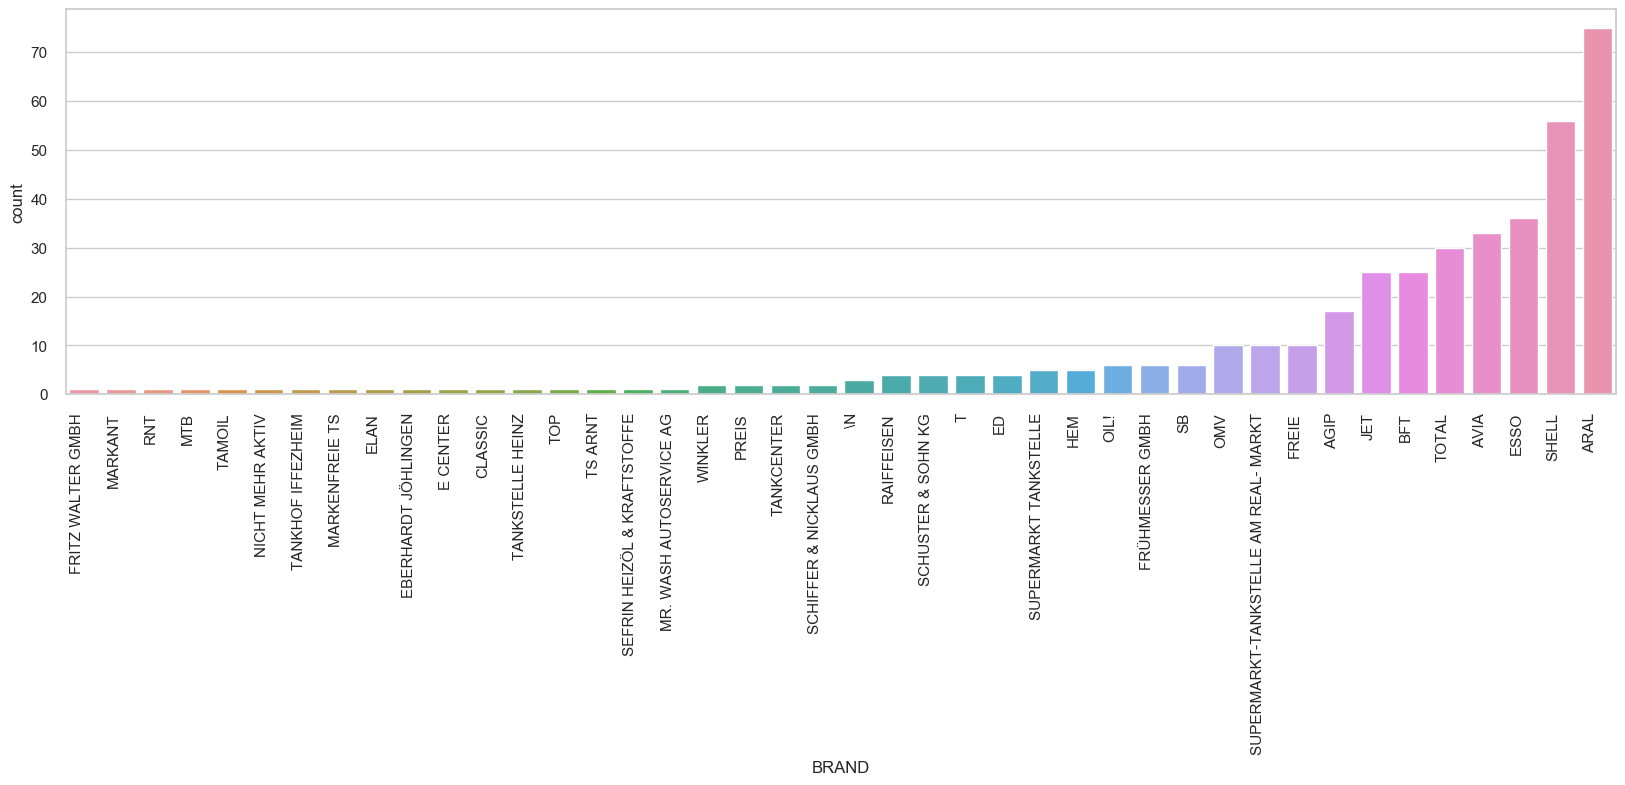

In [33]:
sns.set(context='poster',font_scale=1)
sns.set(style="whitegrid")
f,ax=plt.subplots(figsize=(20,5))
sns.set_color_codes("pastel")
d=sns.barplot(x="BRAND",y="count",data=df)
d.set_xticklabels(d.get_xticklabels(), rotation=90, ha="right")

The above graph shows the no of stations associated to the 42 brands with ARAL having the maximum brands associated to it 


<a id=section4></a>
## 4. Data Normalization

<a id=section401></a>

In [34]:
# Renaming the STID column to 'ID' in fuel_prices DF and mergin with gas_station DF
fuel_prices.rename(columns={'STID': 'ID'}, inplace=True)
Price_Data = pd.merge(gas_station, fuel_prices, on='ID', how='inner')
#Price_Data['TimeChanged']=Price_Data['DATE_CHANGED']

#Price_Data['TimeChanged'] = pd.to_datetime(Price_Data['TimeChanged'])

<a id=section402></a>

In [35]:
# Converting the DATE_CHANGED column type from generic object type to datetime type to suit Time Series Analysis

#Price_Data['DATE_CHANGED'] = pd.to_datetime(Price_Data['DATE_CHANGED'])

# Resetting the index of DataFrame with DATE_CHANGED column to enable time-stamp based indexing
Price_Data = Price_Data.set_index('DATE_CHANGED')

Price_Data.head(2)

,ID,BRAND,POST_CODE,LAT,LNG,ADDRESS,E5,E10,DIESEL,CHANGED
DATE_CHANGED,,,,,,,,,,
2014-12-14 16:30:01,d37bee76-91b6-485a-b974-24f1b0d391fa,ARAL,76139,49.02028,8.459429,Aral TankstelleAn der Tagweide76139Karlsruhe,1369.0,1329.0,1219.0,63
2014-12-14 20:02:01,d37bee76-91b6-485a-b974-24f1b0d391fa,ARAL,76139,49.02028,8.459429,Aral TankstelleAn der Tagweide76139Karlsruhe,1409.0,1369.0,1269.0,21


<a id=section403></a>

In [36]:
# Adding Year, Month, Week, Day
Price_Data['Year'] = Price_Data.index.year
Price_Data['Month'] = Price_Data.index.month
Price_Data['Week'] = Price_Data.index.week
Price_Data['Day'] = Price_Data.index.weekday_name

# Sample 
Price_Data.sample(5, random_state=0)

,ID,BRAND,POST_CODE,LAT,LNG,ADDRESS,E5,E10,DIESEL,CHANGED,Year,Month,Week,Day
DATE_CHANGED,,,,,,,,,,,,,,
2014-11-14 08:41:00,931f746e-a55f-432a-8729-aedd71d138c0,ESSO,66849,49.415491,7.564045,Esso TankstelleSAARBRUECKER STR. 666849LANDSTUHL,1519.0,1479.0,1349.0,21,2014,11,46,Friday
2015-08-18 05:42:01,eb39e146-8263-4093-835d-30c8073e2eb2,SHELL,66877,49.440489,7.555197,RAMSTEIN LANDSTUHLER STR.LANDSTUHLER STR. 7266...,1439.0,1419.0,1159.0,21,2015,8,34,Tuesday
2014-07-01 18:42:01,959cf96c-974f-4154-a0b8-ca4a2d39f1ff,OIL!,68794,49.266521,8.478753,OIL! Tankstelle Oberhausen-RheinhausenKolpings...,1639.0,1599.0,1429.0,63,2014,7,27,Tuesday
2015-04-08 06:30:01,e707bd23-1806-420a-9909-b14c1e221775,ARAL,67269,49.559288,8.170279,Aral TankstelleKirchheimer Straße67269Grünstadt,1429.0,1409.0,1199.0,21,2015,4,15,Wednesday
2015-08-06 12:02:01,80cc039e-493e-4b2b-a9e0-1044b6c63329,SHELL,68165,49.480352,8.479399,MANNHEIM SECKENHEIMER.SECKENHEIMER STRASSE 176...,1459.0,1439.0,1159.0,21,2015,8,32,Thursday


In [37]:
Price_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1059346 entries, 2014-12-14 16:30:01 to 2015-03-31 10:42:01
Data columns (total 14 columns):
ID           1059346 non-null object
BRAND        1059346 non-null object
POST_CODE    1059346 non-null object
LAT          1059346 non-null float64
LNG          1059346 non-null float64
ADDRESS      1059346 non-null object
E5           1059346 non-null float64
E10          1059346 non-null float64
DIESEL       1059346 non-null float64
CHANGED      1059346 non-null int64
Year         1059346 non-null int64
Month        1059346 non-null int64
Week         1059346 non-null int64
Day          1059346 non-null object
dtypes: float64(5), int64(4), object(5)
memory usage: 121.2+ MB


In [38]:
#calculating history based on DATE_CHANGED and STID
stid_start_min=fuel_prices.groupby('ID')['DATE_CHANGED'].min().reset_index()
stid_start_max=fuel_prices.groupby('ID')['DATE_CHANGED'].max().reset_index()
max_date=stid_start_max['DATE_CHANGED']
min_date= stid_start_min['DATE_CHANGED']
no_days= max_date-min_date
no_days= no_days.apply(lambda x: x.days)
stid_start_min['HISTORY']=no_days

<a id=section404></a>

In [39]:
# Subsetting brand and their respective gas type prices only
brand_prices = Price_Data[['ID','BRAND','E5', 'E10', 'DIESEL']]
brand_prices.head()
History=pd.merge(brand_prices,stid_start_min, on ='ID')
History.sample()


,ID,BRAND,E5,E10,DIESEL,DATE_CHANGED,HISTORY
160234,53f1bb34-8123-4b7a-aa25-94b3a49d82d3,AVIA,1539.0,1499.0,1339.0,2014-06-08 09:50:01,478


In [40]:
TimeData=Price_Data[['BRAND','E5', 'E10', 'DIESEL']]

In [41]:
#pd.pivot_table(brand_prices,index=["BRAND","Year","Month"])

<a id=section5></a>
## 5. EDA through Questions

<a id=section501></a>

#### 1. How many different stations exist in the data set and what is the existing history in days?

In [42]:
##  Number of  stations in original  Dataset are 412 ,Number of stations after removing brands with nan and NICHT MEHR AKTIV  



print('The number of different stations in data set are: {0}'.format(Price_Data.ID.nunique()))

print('The number of different brands in data set are: {0}'.format(Price_Data.BRAND.nunique()))

The number of different stations in data set are: 389
The number of different brands in data set are: 42


[Text(0, 0, 'ARAL'),
 Text(0, 0, 'JET'),
 Text(0, 0, 'SUPERMARKT-TANKSTELLE AM REAL- MARKT'),
 Text(0, 0, 'TANKHOF IFFEZHEIM'),
 Text(0, 0, 'SCHIFFER & NICKLAUS GMBH'),
 Text(0, 0, 'SEFRIN HEIZÖL & KRAFTSTOFFE'),
 Text(0, 0, 'BFT'),
 Text(0, 0, 'MARKANT'),
 Text(0, 0, 'AVIA'),
 Text(0, 0, 'NICHT MEHR AKTIV'),
 Text(0, 0, 'FREIE'),
 Text(0, 0, 'HEM'),
 Text(0, 0, 'FRITZ WALTER GMBH'),
 Text(0, 0, 'TAMOIL'),
 Text(0, 0, 'RNT'),
 Text(0, 0, '\\N'),
 Text(0, 0, 'SCHUSTER & SOHN KG'),
 Text(0, 0, 'E CENTER'),
 Text(0, 0, 'EBERHARDT JÖHLINGEN'),
 Text(0, 0, 'AGIP'),
 Text(0, 0, 'WINKLER'),
 Text(0, 0, 'MR. WASH AUTOSERVICE AG'),
 Text(0, 0, 'ESSO'),
 Text(0, 0, 'RAIFFEISEN'),
 Text(0, 0, 'SUPERMARKT TANKSTELLE'),
 Text(0, 0, 'CLASSIC'),
 Text(0, 0, 'SHELL'),
 Text(0, 0, 'PREIS'),
 Text(0, 0, 'MTB'),
 Text(0, 0, 'TANKCENTER'),
 Text(0, 0, 'TS ARNT'),
 Text(0, 0, 'OMV'),
 Text(0, 0, 'FRÜHMESSER GMBH'),
 Text(0, 0, 'OIL!'),
 Text(0, 0, 'SB'),
 Text(0, 0, 'TOTAL'),
 Text(0, 0, 'ED'),
 Text(0, 0,

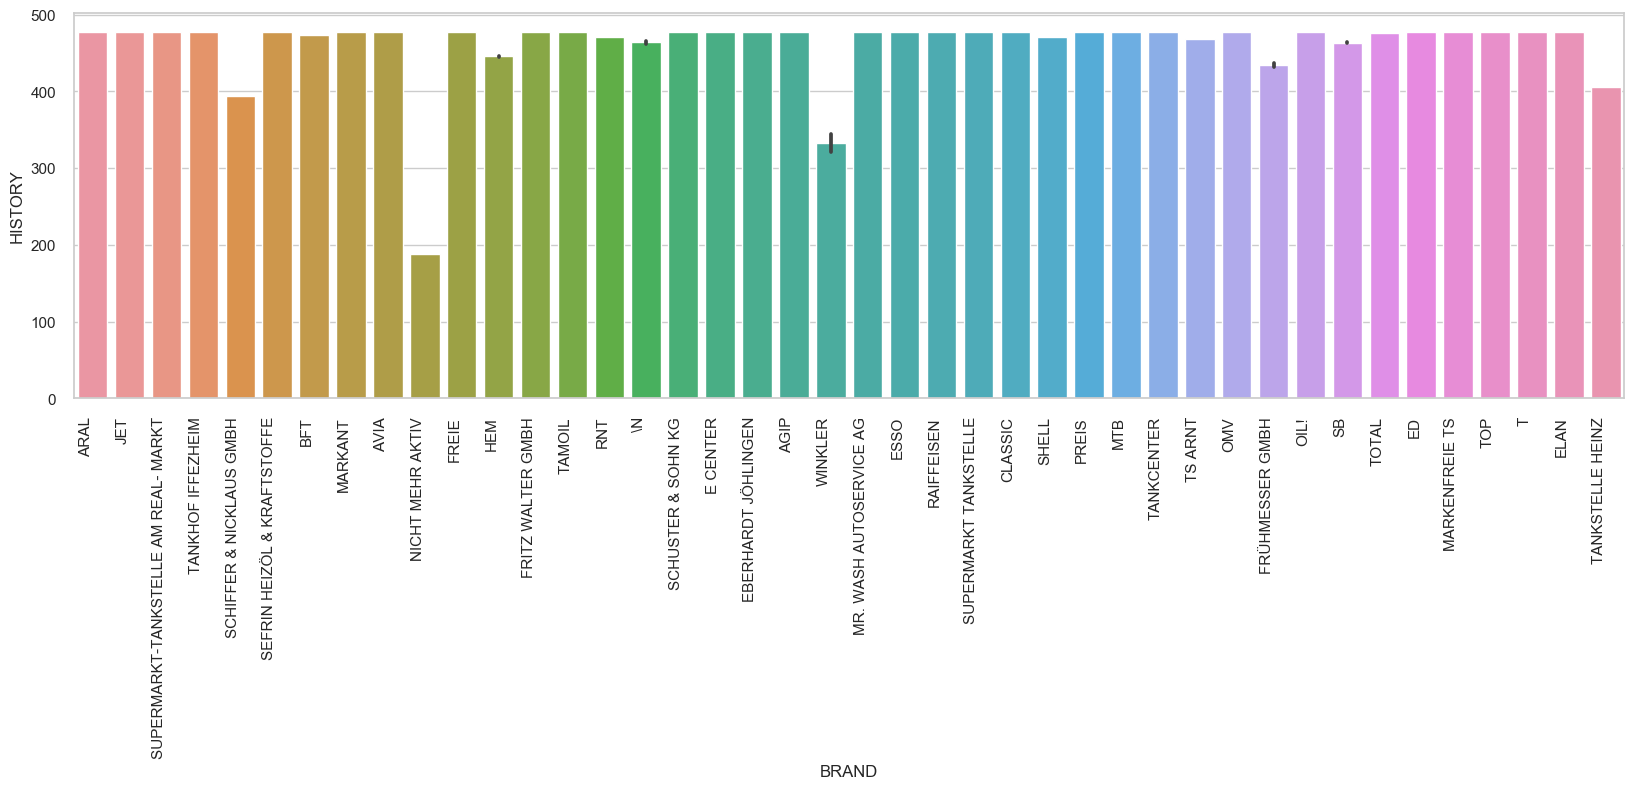

In [43]:
sns.set_context('poster')
sns.set(style="whitegrid")
f,ax=plt.subplots(figsize=(20,5))
sns.set_color_codes("pastel")
history_days = sns.barplot(x='BRAND',y="HISTORY",data=History)
history_days.set_xticklabels(history_days.get_xticklabels(), rotation=90, ha="right")


<a id=section502></a>

#### 2. What is the min, mean, max price for each gasoline type and station weekly?

Text(0, 0.5, 'Euro (Cents)')

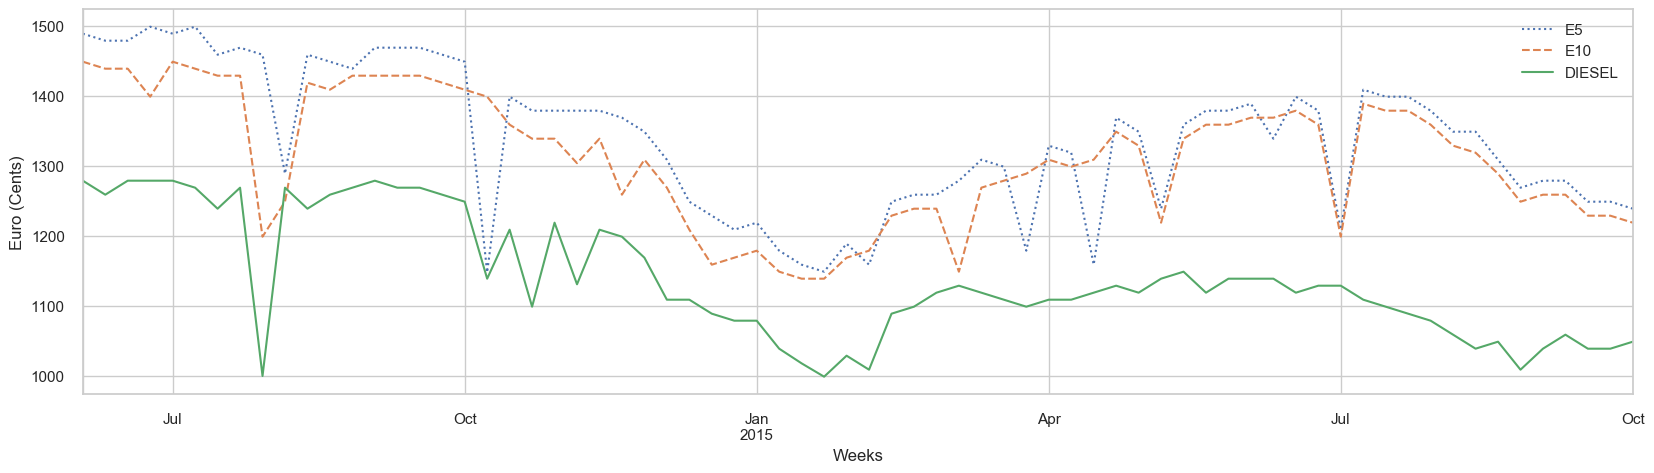

In [44]:
# Weekly Minimum Price of Each Gasoline Type:
weekly_min = TimeData.resample('W').min()
weekly_min.plot(figsize=(20,5), style=[':', '--', '-'])
plt.legend(loc='upper right')
plt.xlabel('Weeks')
plt.ylabel('Euro (Cents)')

Text(0, 0.5, 'Euro (Cents)')

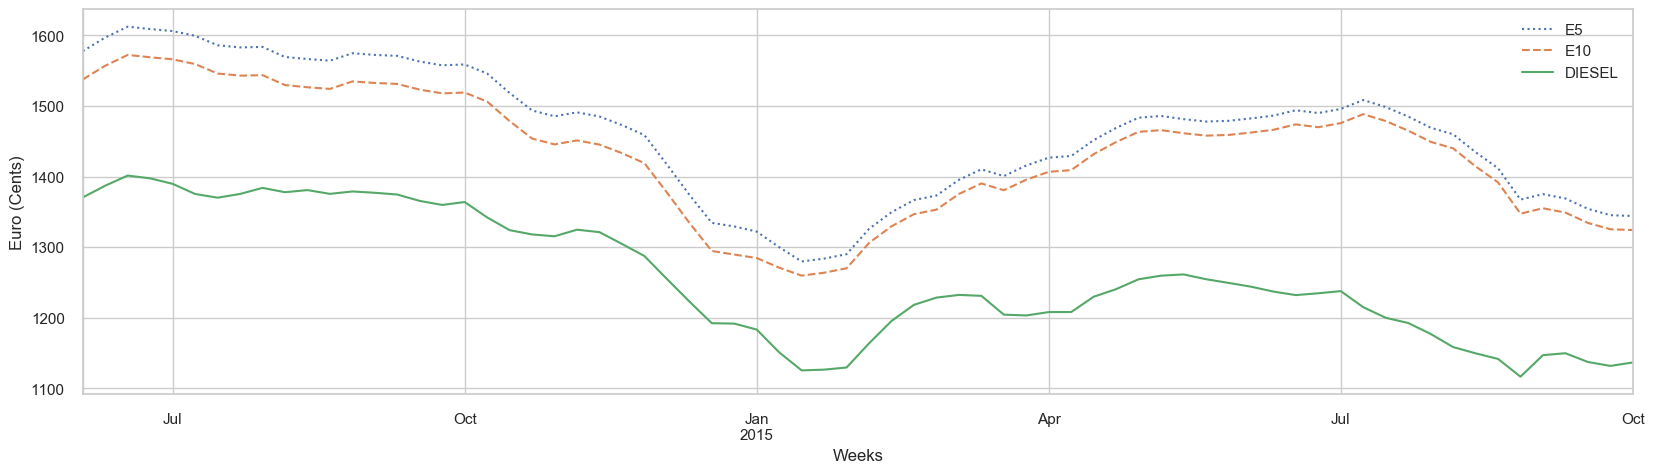

In [45]:

# Weekly Mean Price of Each Gasoline Type:
weekly_mean = brand_prices.resample('W').mean()
weekly_mean.plot(figsize=(20,5), style=[':', '--', '-'])
plt.legend(loc='upper right')
plt.xlabel('Weeks')
plt.ylabel('Euro (Cents)')                                       

Text(0, 0.5, 'Euro (Cents)')

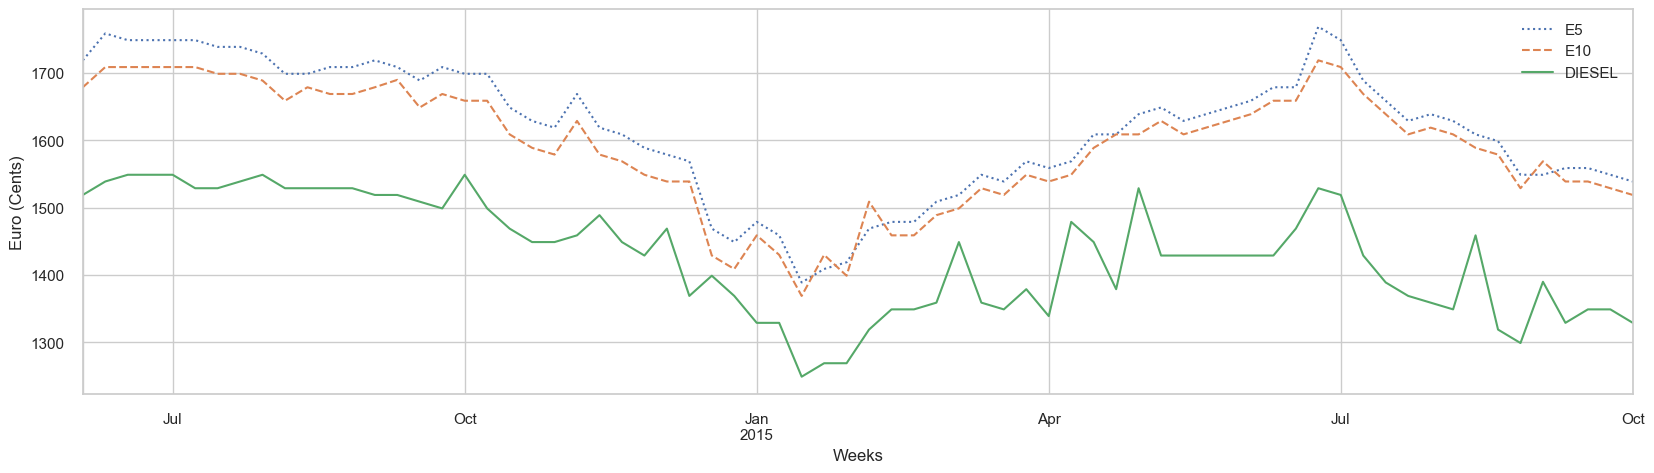

In [46]:
# Weekly Maximum Price of Each Gasoline Type:
weekly_max = brand_prices.resample('W').max()
weekly_max.plot(figsize=(20,5), style=[':', '--', '-'])
plt.legend(loc='upper right')
plt.xlabel('Weeks')
plt.ylabel('Euro (Cents)')


The maximum prices of gasoline types are: 
a. E5 :1800(approx)
b. E10 : 1700 (approx)
c. DIESEL : 1550 (approx)

<a id=section503></a>

#### 3. What is the cheapest station (in average) and why?

In [47]:
#gas_station_fuel_prices.groupby('BRAND').size()
#Grouping Data to find the cheapest station

E5=Price_Data.groupby('BRAND')['E5'].min().sort_values().reset_index()
E10=Price_Data.groupby('BRAND')['E10'].min().sort_values().reset_index()
Diesel=Price_Data.groupby('BRAND')['DIESEL'].min().sort_values().reset_index()
cheapest=pd.merge(pd.merge(E5,E10,on="BRAND"),Diesel,on="BRAND")

In [48]:
cheapest['Mean']=cheapest.mean(axis=1)
cheapest.sort_values("Mean",axis=0,ascending=True,inplace=True,na_position='last')
cheapest.head()

,BRAND,E5,E10,DIESEL,Mean
1,HEM,1149.0,1139.0,999.0,1095.666667
2,SUPERMARKT TANKSTELLE,1159.0,1139.0,999.0,1099.000000
5,JET,1169.0,1149.0,999.0,1105.666667
3,OMV,1159.0,1159.0,1009.0,1109.000000
4,BFT,1159.0,1149.0,1034.0,1114.000000


[Text(0, 0, 'HEM'),
 Text(0, 0, 'SUPERMARKT TANKSTELLE'),
 Text(0, 0, 'JET'),
 Text(0, 0, 'OMV'),
 Text(0, 0, 'BFT'),
 Text(0, 0, 'FREIE'),
 Text(0, 0, 'MR. WASH AUTOSERVICE AG'),
 Text(0, 0, 'SUPERMARKT-TANKSTELLE AM REAL- MARKT'),
 Text(0, 0, 'T'),
 Text(0, 0, 'AVIA'),
 Text(0, 0, 'SB'),
 Text(0, 0, 'E CENTER'),
 Text(0, 0, 'TANKCENTER'),
 Text(0, 0, 'OIL!'),
 Text(0, 0, 'FRÜHMESSER GMBH'),
 Text(0, 0, 'FRITZ WALTER GMBH'),
 Text(0, 0, 'ARAL'),
 Text(0, 0, 'TOTAL'),
 Text(0, 0, 'AGIP'),
 Text(0, 0, '\\N'),
 Text(0, 0, 'ED'),
 Text(0, 0, 'PREIS'),
 Text(0, 0, 'ELAN'),
 Text(0, 0, 'ESSO'),
 Text(0, 0, 'TOP'),
 Text(0, 0, 'MARKENFREIE TS'),
 Text(0, 0, 'MARKANT'),
 Text(0, 0, 'SCHUSTER & SOHN KG'),
 Text(0, 0, 'CLASSIC'),
 Text(0, 0, 'RAIFFEISEN'),
 Text(0, 0, 'TANKSTELLE HEINZ'),
 Text(0, 0, 'SHELL'),
 Text(0, 0, 'WINKLER'),
 Text(0, 0, 'RNT'),
 Text(0, 0, 'TAMOIL'),
 Text(0, 0, 'TANKHOF IFFEZHEIM'),
 Text(0, 0, 'MTB'),
 Text(0, 0, 'TS ARNT'),
 Text(0, 0, 'SEFRIN HEIZÖL & KRAFTSTOFFE')

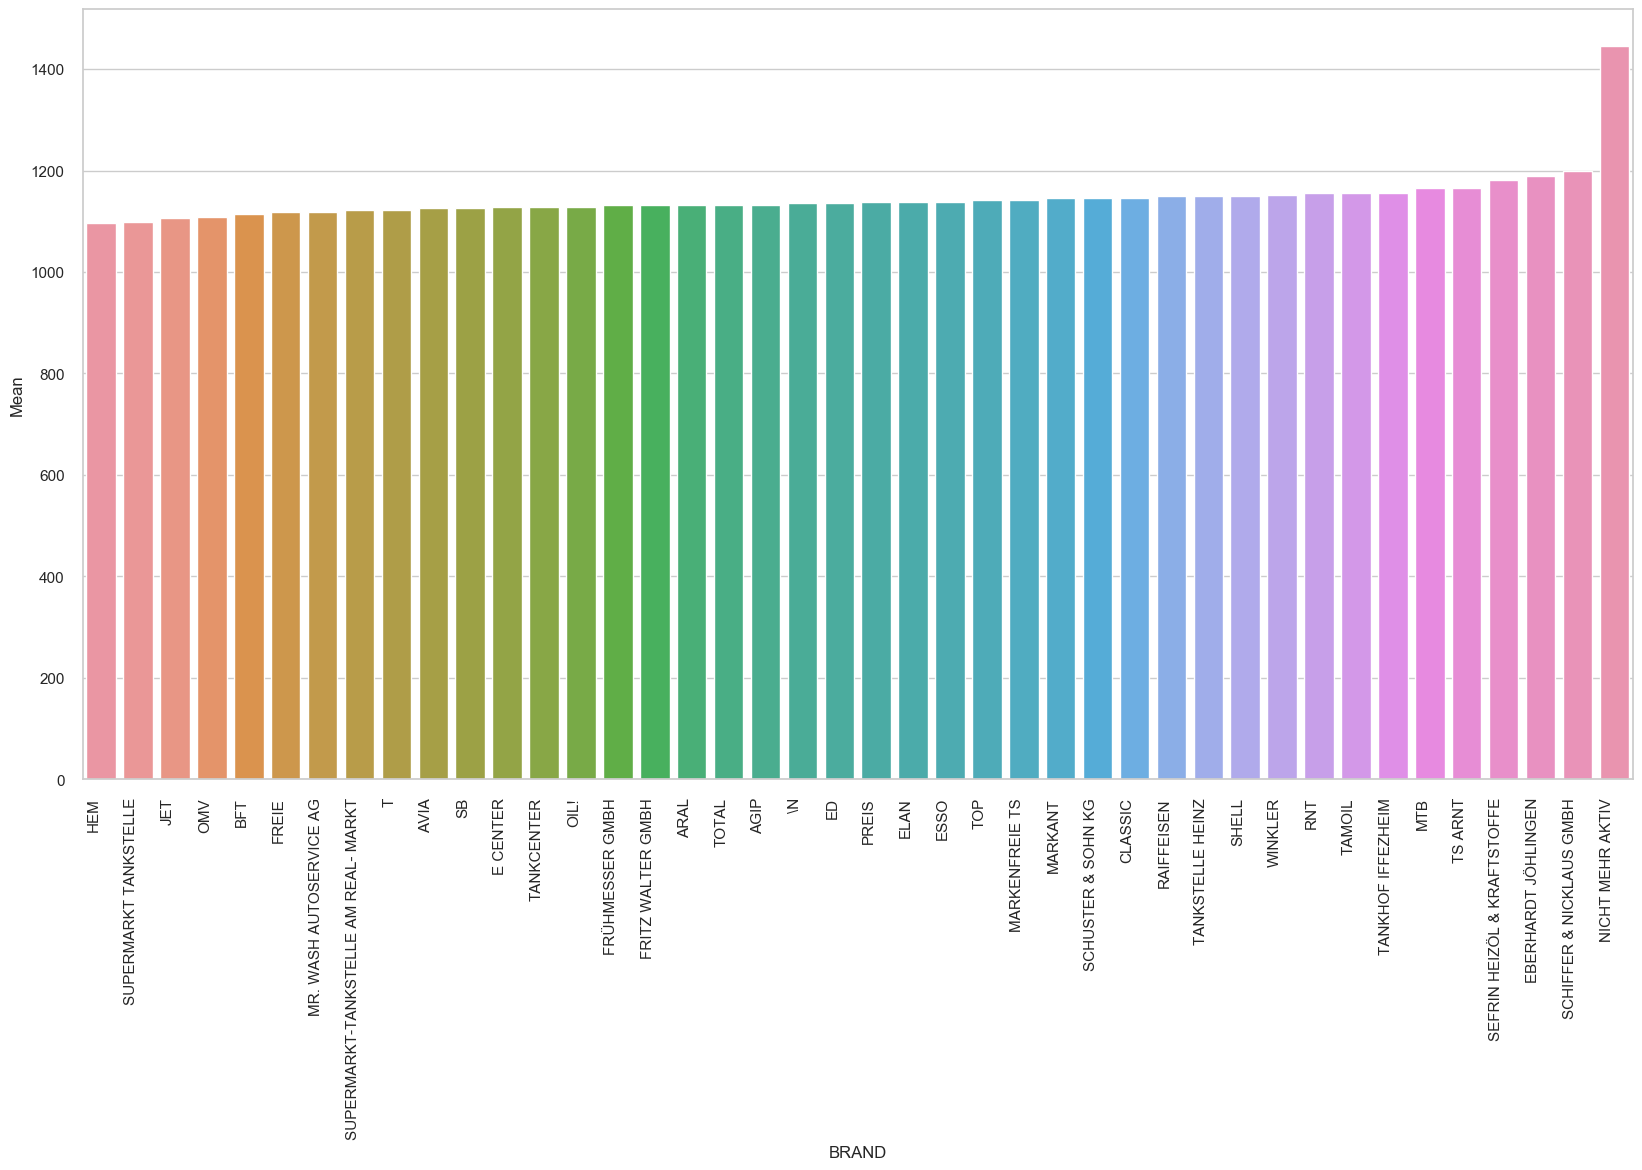

In [49]:
sns.set_context('poster')
sns.set(style="whitegrid")
f,ax=plt.subplots(figsize=(20,10))
sns.set_color_codes("pastel")
Cheap=sns.barplot(x="BRAND",y="Mean",data=cheapest)
Cheap.set_xticklabels(Cheap.get_xticklabels(), rotation=90, ha="right")

HEM is the cheapest station 

<a id=section504></a>

#### 4. At which day of a week is the price most likely the cheapest (week profile)?

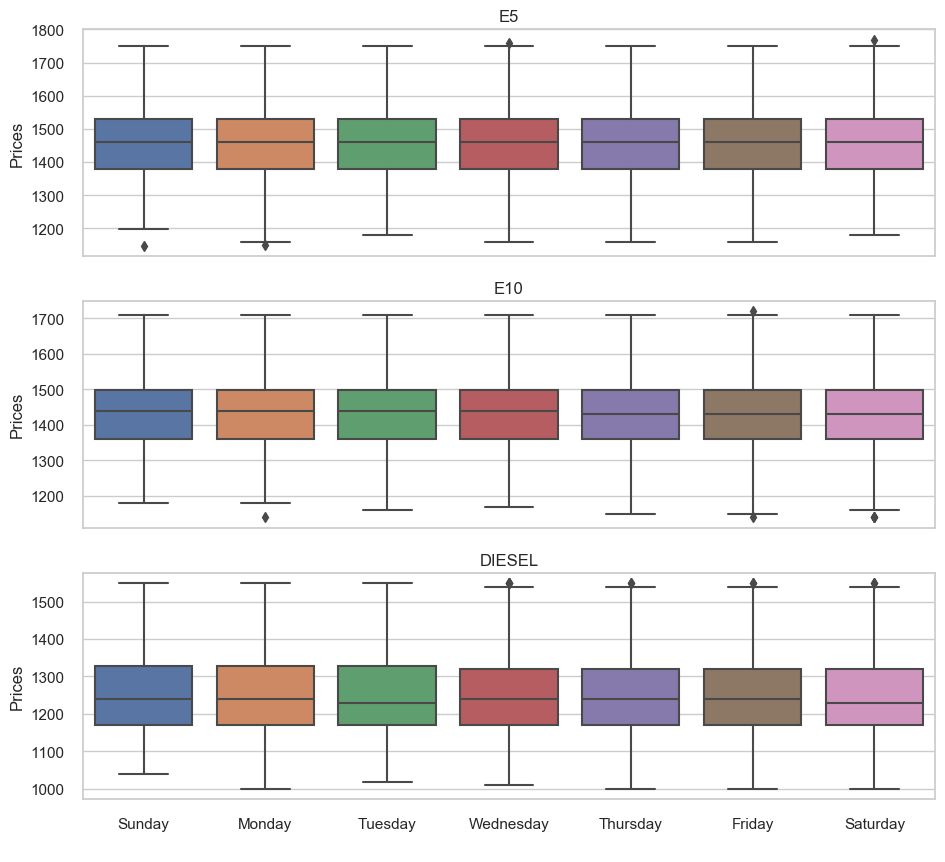

In [50]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['E5', 'E10', 'DIESEL'], axes):
    sns.boxplot(data=Price_Data, x='Day', y=name, ax=ax)
    ax.set_ylabel('Prices')
    ax.set_xlabel(' ')
    ax.set_title(name)


There is not much noticeable fluctuation in price along the week. But sundays seems to be a good choice for a refill <br>


#### 5. At which hour during a day is the price the cheapest in average (hour profile)?

(array([    0,  3600,  7200, 10800, 14400, 18000, 21600, 25200, 28800,
        32400, 36000, 39600, 43200, 46800, 50400, 54000, 57600, 61200,
        64800, 68400, 72000, 75600, 79200, 82800]),
 <a list of 24 Text xticklabel objects>)

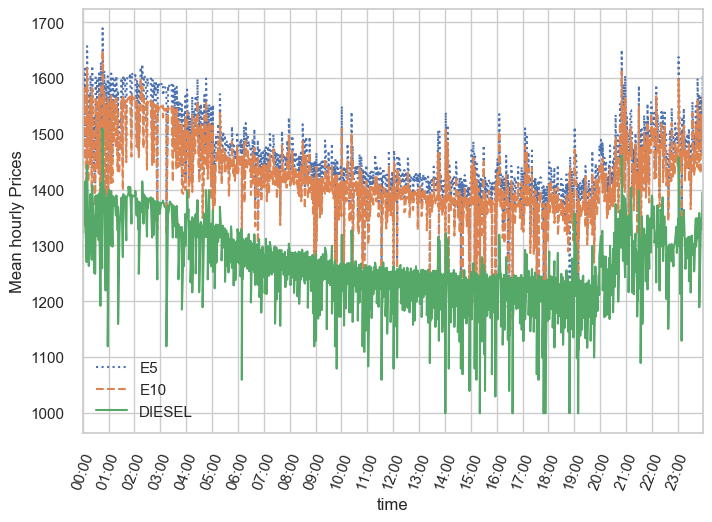

In [51]:
hourly_prices = brand_prices.groupby(brand_prices.index.time).mean()
hourly = 1 * 60 * 60 * np.arange(24)
hourly_prices.plot(xticks=hourly, style=[':', '--', '-']);
plt.ylabel('Mean hourly Prices')
plt.xticks(rotation=70)

_As we can see from above that the cheapest price of a fuel during a day is_:<br> 
 a. __05:45 am__ _in the morning for_ __E5__ _gas_ <br>
 b. __03:00 am__ _in the morning for_ __E10__ _gas_ <br>
 c. __14:00 pm__ _in the afternoon  to 19:00 for_ __DIESEL__ 

<a id=section506></a>

#### 6. How many different station locations are present in the data (visualize via a map)?

In [52]:
print('The unique number of Postal Codes are: {0}'.format(gas_station.POST_CODE.nunique()))
      

The unique number of Postal Codes are: 174


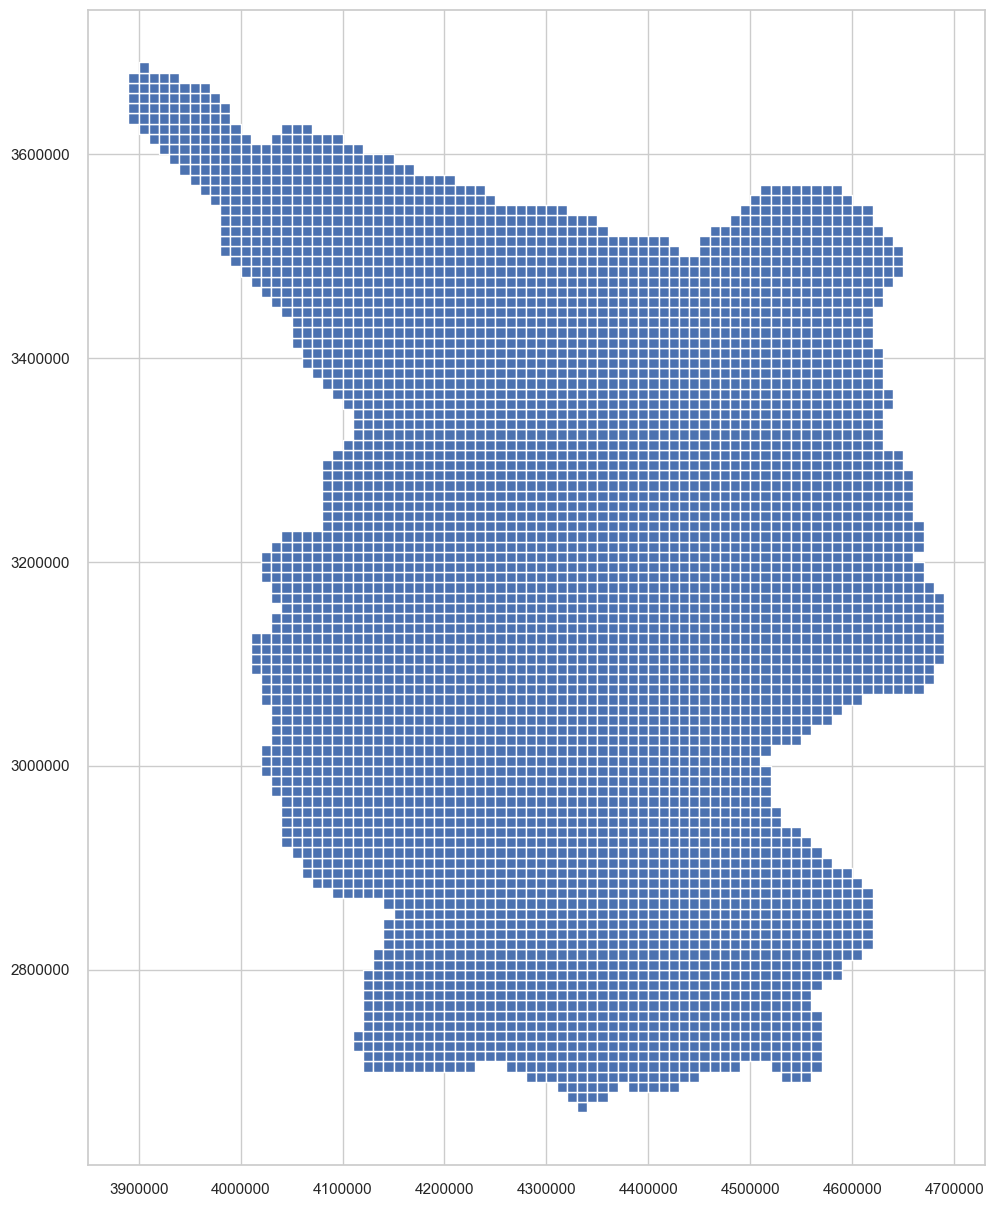

In [53]:
map_df = gpd.read_file("de_10km.shp")
fig,ax = plt.subplots(figsize=(15,15))
map_df.plot(ax=ax)

In [54]:
geometry=[Point(xy) for xy in zip (gas_station["LNG"],gas_station["LAT"])]
geometry[:3]

<a id=section507></a>

In [55]:
geo_df = gpd.GeoDataFrame(gas_station,crs=map_df.crs, geometry=geometry)
geo_df.head()

,ID,BRAND,POST_CODE,LAT,LNG,ADDRESS,geometry
0,d37bee76-91b6-485a-b974-24f1b0d391fa,ARAL,76139,49.020280,8.459429,Aral TankstelleAn der Tagweide76139Karlsruhe,POINT (8.459429 49.0202799)
1,51d4b652-a095-1aa0-e100-80009459e03a,JET,68169,49.508962,8.467691,JET MANNHEIM UNTERMUEHLAUSTRASSE 83UNTERMUEHLA...,POINT (8.467691 49.5089619)
2,c7caf231-0e47-40db-92de-9349a2eb2bef,ARAL,67663,49.433754,7.757465,Aral TankstelleTrippstadter Straße67663Kaisers...,POINT (7.7574649 49.433754)
3,51d4b53b-a095-1aa0-e100-80009459e03a,JET,67655,49.442200,7.748360,JET KAISERSLAUTERN PARISER STR. 167PARISER STR...,POINT (7.748359900000001 49.4421999)
4,51d4b70f-a095-1aa0-e100-80009459e03a,JET,76726,49.226800,8.374400,JET GERMERSHEIM MUENCHENER STRASSE 12MUENCHENE...,POINT (8.3743999 49.2267999)


In [56]:
geometry=[Point(xy) for xy in zip (gas_station["LNG"],gas_station["LAT"])]
geometry[:3]

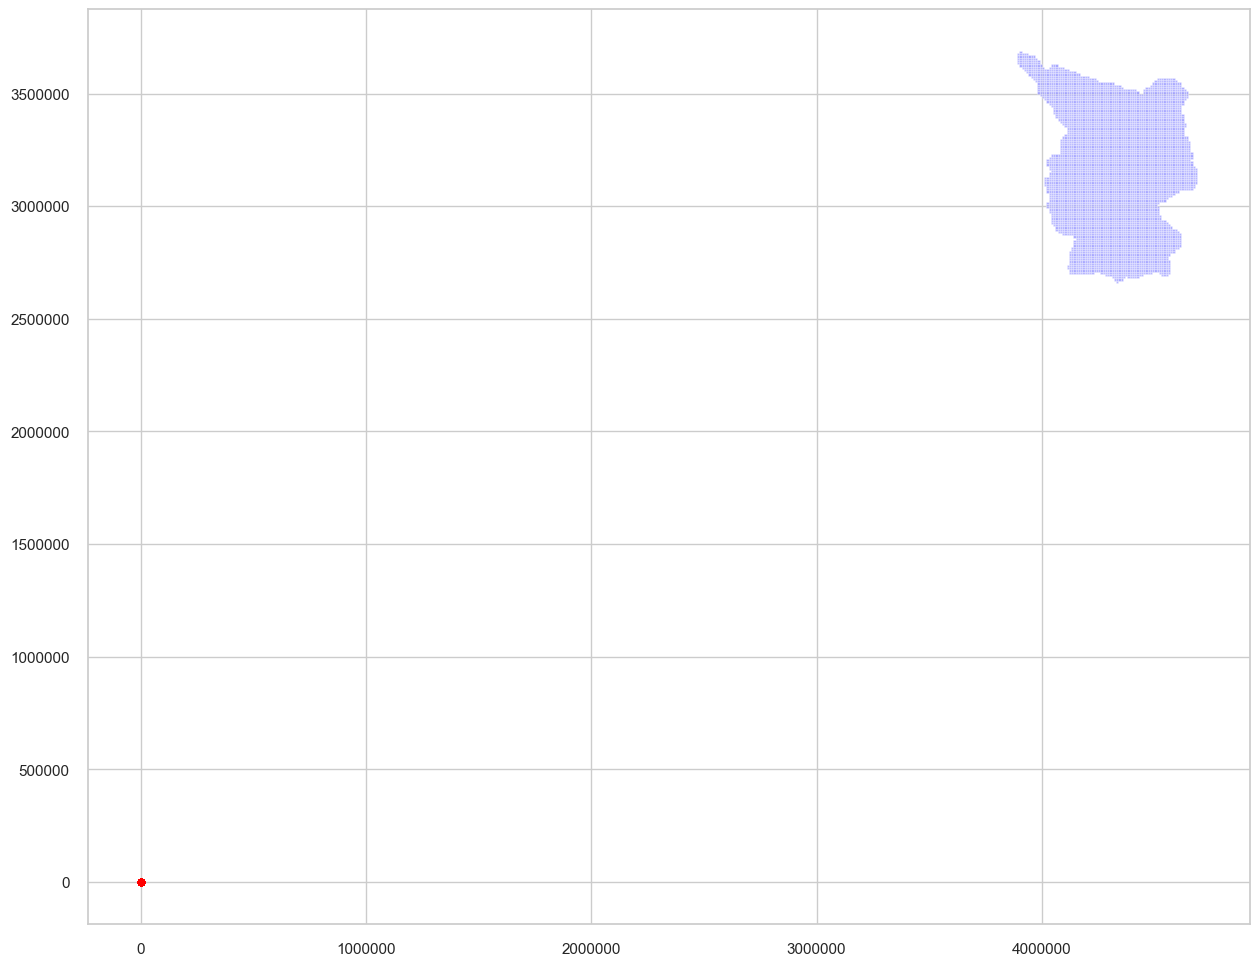

In [57]:
fig,ax=plt.subplots(figsize=(15,15))
map_df.plot(ax=ax, alpha=0.4,color="blue")
geo_df.plot(ax=ax,markersize=20,color="red",marker="o")

#### 7. What is the gas station which has most price data points, choose one and draw the time series for all 3 gasoline types?

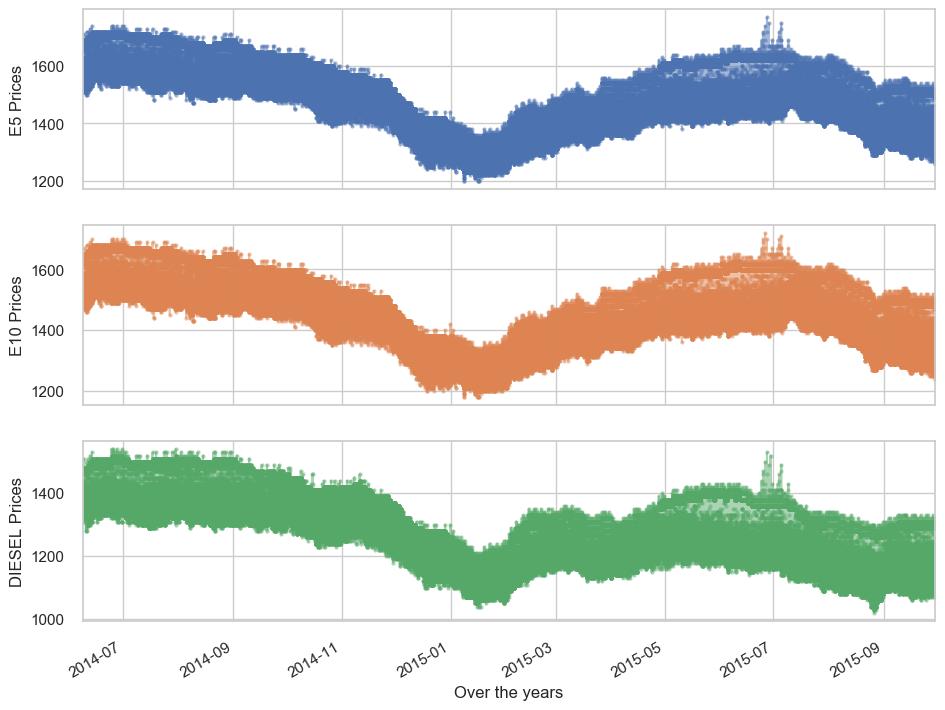

In [58]:
# Aral is the gas station which has got the most price data points
aral_gas_station = Price_Data.loc[Price_Data['BRAND'] == 'ARAL']

# Selecting the different types of Gas
gas_types = ['E5', 'E10', 'DIESEL']

# Plotting time series for 3 gasoline types
axes = aral_gas_station[gas_types].plot(marker='.', alpha=0.5, figsize=(11, 9), subplots=True,legend=False )
for fuel, ax in zip(gas_types, axes):
    ax.set_ylabel(fuel + ' Prices')
    ax.set_xlabel('Over the years')
    

<a id=section508></a>

#### 8. At which hour during a day do we have the most price changes?

_From the graph above, it is evident that the most price changes in a day have occured at:_ __03:00__ am _in the morning_

#### 9. Select 20 gas stations having the longest time history and visualize the average price per month. Use heatmap and only the prices between 12:00-13:00 of E10 and DIESEL

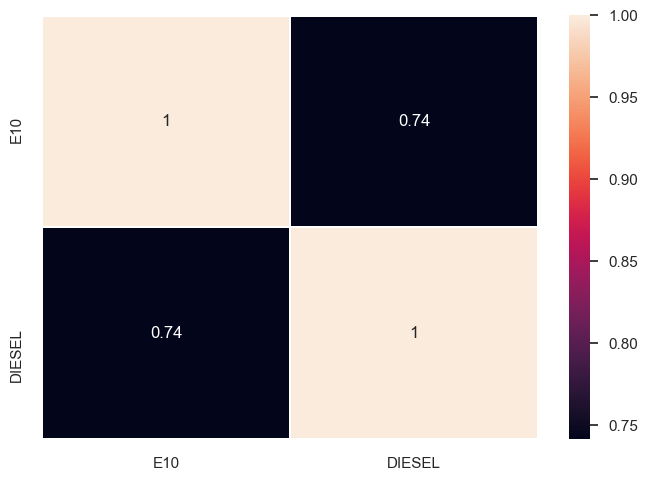

In [59]:
# Considering prices between 12:00 and 13:00
prices_time_interval = Price_Data.between_time('12:00', '13:00')
prices_time_interval = prices_time_interval.loc[:,['BRAND', 'E10', 'DIESEL']]

# Grouping by BRAND to get the top 20 for the longest time history
top_20_gas_stations_data = Price_Data.groupby(['BRAND']).size().sort_values(ascending=False).head(20)
top_20_gas_stations_name = top_20_gas_stations_data.index
prices_time_interval = prices_time_interval.loc[prices_time_interval['BRAND'].isin(top_20_gas_stations_name)]

# Drawing the heatmap:
sns.heatmap(prices_time_interval.corr(), annot=True, linewidths=1)

<a id=section510></a>

#### 10. Describe a possible business potential in Euros for the customer (textual description in the ipython file). Define the constraints of the business case 5 lines, the answer max 15 lines (high level summary)

Assuming that the fleet management company operates within the post code areas of the given data set on weekdays for full 24 hours.
The following general rules can be formed for a reduction in operation cost can not indicate the reduction in the cost (need to take further look into data )
1.For filling fuel at any time of the day choosing a small brand over large is preferable
2.Diesel is cheaper (if mileage requirement is met).Make it a priority to use diesel fuels
3.Further there is not much fluctuation of prices in the days of the week and the vehicles can be refuelled based on time of the day rather than the day


In [60]:
import unittest

In [61]:

def minimum_values(data):
    return data.min()


def maximum_values(data):
    return data.max()


def mean_values(data):
    return data.mean()

class TestTimeMethods(unittest.TestCase):
    def test_minimum_values(self):
        data_frame = {'col1': [0,-5,3], 'col2': [-1,-6,5]}
        data = pd.DataFrame(data=data_frame)
        self.assertEqual(minimum_values(data["col1"]), -5)
        self.assertEqual(minimum_values(data["col2"]), -6)

    def test_mean_values(self):
        data_frame = {'col1': [1, 2, 3], 'col2': [10, -1, -3]}
        data = pd.DataFrame(data=data_frame)
        self.assertEqual(mean_values(data["col1"]), 2)
        self.assertEqual(mean_values(data["col1"]), 2)

    def test_maximum_values(self):
        data_frame = {'col1': [1, 9, 8], 'col2': [10, 1, -4]}
        data = pd.DataFrame(data=data_frame)
        self.assertEqual(maximum_values(data["col1"]), 9)
        self.assertEqual(maximum_values(data["col2"]), 10)

unittest.main(argv=[''], verbosity=2, exit=False)

test_maximum_values (__main__.TestTimeMethods) ... ok
test_mean_values (__main__.TestTimeMethods) ... ok
test_minimum_values (__main__.TestTimeMethods) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.007s

OK
